In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [201]:
import nltk
import urllib.request
import math
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#C:\Users\IAmir Ingher\AppData\Roaming\nltk_data

<h3>Fetching data</h3>

In [134]:
text = open('Sherlock_Holmes.txt','r').read()

In [278]:

sentences = text.split('. ')

print(sentences[200])

It was
the most preposterous position in which I ever found myself in my
life, and it was the thought of it that started me laughing just
now


<h3>Creating functions</h3>

In [137]:
def getToken(text):
    tokens = text.split()
    tokens=[token.lower() for token in tokens if token.isalpha()]
    return tokens

In [138]:
def getFreq(tokens):
    freq = nltk.FreqDist(tokens) 
    return freq

In [139]:
def printFreq(freq):
    for key,val in freq.items(): 
        print ("%30s %5d" % (str(key), val))

In [140]:
def removeStopwords(lang,tokens):
    sw = stopwords.words(lang)
    #print(sw)
    ctokens = tokens
    for token in tokens:
        if token in sw:
            ctokens.remove(token)
    #print(ctokens)
    return ctokens

In [141]:

def lemmatizerText(ctokens):
    # Stem
    #stemmer = PorterStemmer()
    #for i in range(len(ctokens)):
    #    ctokens[i] = stemmer.stem(ctokens[i])
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    for i in range(len(ctokens)):
        ctokens[i] = lemmatizer.lemmatize(ctokens[i])

    return ctokens

In [142]:
#freq = nltk.FreqDist(ctokens)

#for key,val in freq.items(): 
 #   print ("%30s %5d" % (str(key), val))

<h3>Fetching positive and negative words</h3>

In [143]:
pos = open('positive-words.txt','r').read().split()
neg = open('negative-words.txt','r').read().split()

<h3>Function whitch returns calculated positive, negative and neutral values</h3>

In [175]:

#sentence = text.split('. ')

def staticsFromSentence(sentence):
    
    countpositive = countnegative = countneutral = counttotal = 0
    
    tokens= getToken(sentence)
    ctokens= removeStopwords('english',tokens)
    ctokens= lemmatizerText(ctokens)
    for token in ctokens:
        counttotal = counttotal + 1
        if token in pos:
            countpositive = countpositive + 1
        elif token in neg:
            countnegative = countnegative + 1
        else:
            countneutral = countneutral + 1
    
    posi = countpositive/counttotal if countpositive != 0 else 0
    nega = countnegative/counttotal if countnegative != 0 else 0
    net = countneutral/counttotal if countneutral != 0 else 0
    
    return {'sentence':sentence,'positive':posi,'negative':nega,
            'neutral':net}       

<h3>Function that analyzes the whole books sentences and returns a list of sentences with positive, negative, neutral values</h3>

In [176]:
def analyzeSentences(sentences):    
    ls=[]
    for sentence in sentences:
        ls.append(staticsFromSentence(sentence))
        
    return ls    

In [177]:
slist = analyzeSentences(sentences)


In [178]:
print(slist[62]) 

{'sentence': 'But the note itself.\nWhat do you deduce from it?"\n\nI carefully examined the writing, and the paper upon which it was\nwritten.\n\n"The man who wrote it was presumably well to do," I remarked,\nendeavouring to imitate my companion\'s processes', 'positive': 0.05, 'negative': 0, 'neutral': 0.95}


<h3>calculates the mean value for positive and negative words in a sentence</h3>

In [213]:
def formNegValue(negnes,leng):
    return negnes/leng

def formPosValue(posnes,leng):
    return posnes/leng

<h3>Function gives a list of positiveness values</h3>

In [265]:
def getpositiveness(t,l):
    positiveness = []
    negativeness = []
    i = 0
    calc=0
    leng = l

    posnes = 0
    negnes = 0
    for v in slist:
    
        if i < leng:

            posnes += v['positive']
            negnes += v['negative']
        else:
            positiveness.append(formPosValue(posnes,leng))
            negativeness.append(formNegValue(negnes,leng))
            posnes = 0
            negnes = 0
            i=0
        i=i+1
      
    if t == 'pos': return positiveness 
    else: return negativeness

<h3>Positiveness with 20 sentences positive mean value</h3>


In [266]:
positiveness = getpositiveness('pos',20)

    

In [267]:
df = pd.DataFrame(positiveness,columns = {'pos'})

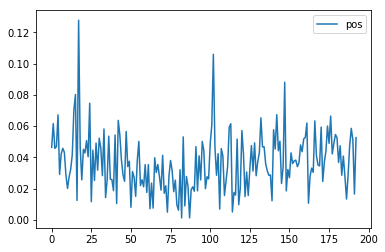

In [268]:
df.plot(style=['-','rx'])

<h3>Positiveness with 50 sentences positive mean value</h3>


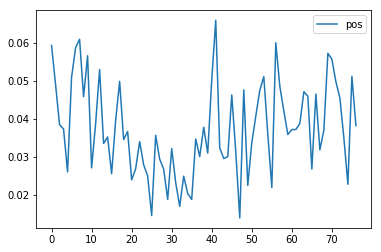

In [269]:
positiveness = getpositiveness('pos',50)

df = pd.DataFrame(positiveness,columns = {'pos'})
df.plot(style=['-','rx'])

<h3>Positiveness with 100 sentences positive mean value</h3>


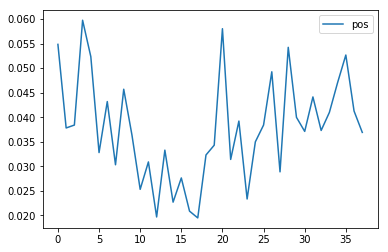

In [270]:
positiveness = getpositiveness('pos',100)

df = pd.DataFrame(positiveness,columns = {'pos'})
df.plot(style=['-','rx'])

<h3>Positiveness with 200 sentences positive mean value</h3>


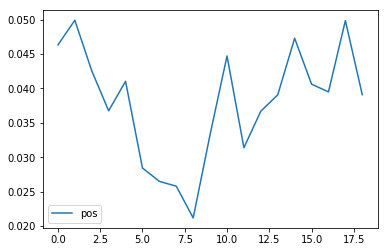

In [274]:
positiveness = getpositiveness('pos',200)

df = pd.DataFrame(positiveness,columns = {'pos'})
df.plot(style=['-','rx'])

<h3>Negativeness with 200 sentences negative mean value</h3>


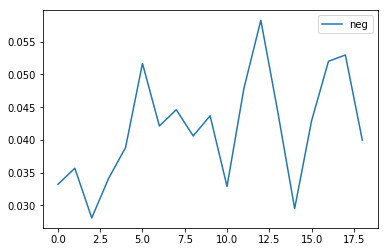

In [277]:
negativeness = getpositiveness('neg',200)
df = pd.DataFrame(negativeness,columns = {'neg'})
df.plot(style=['-','rx'])

<h2>Conclusions</h2>
<br>
<p>
We can see from graphs the books positiveness values and from the last graph we can see the negativeness values. I tried to make as many functions for different tasks so that we could observe our books content more easily.
</p>